<a href="https://colab.research.google.com/github/fanttt/hydroponics/blob/master/Python_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отриманне данных


In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Київ")
data_json = response.json()

Створення DataFrame

In [ ]:
df = pd.DataFrame(data_json["data"])

In [ ]:
df.head()

,at,val
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


In [ ]:
df.shape

(387, 2)

In [ ]:
df.columns

Index(['at', 'val'], dtype='object')

In [ ]:
df.dtypes

at     object
val     int64
dtype: object

Пидготовка данных

In [ ]:
df["at"] = pd.to_datetime(df['at'])

In [ ]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [ ]:
df = df.rename(columns = {"at":"Дата","val":"Вакансии"})
df.head()

,Дата,Вакансии
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


Побудова графикив

In [ ]:
df.set_index('Дата',inplace=True)

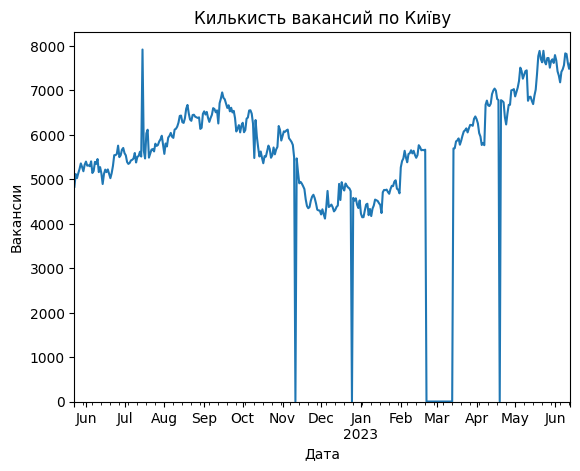

In [ ]:
df["Вакансии"].plot()
plt.title("Килькисть вакансий по Київу")
plt.xlabel('Дата')
plt.ylabel('Вакансии')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df['Вакансии']=df['Вакансии'].replace(0,np.nan)
df['Вакансии']=df['Вакансии'].interpolate()

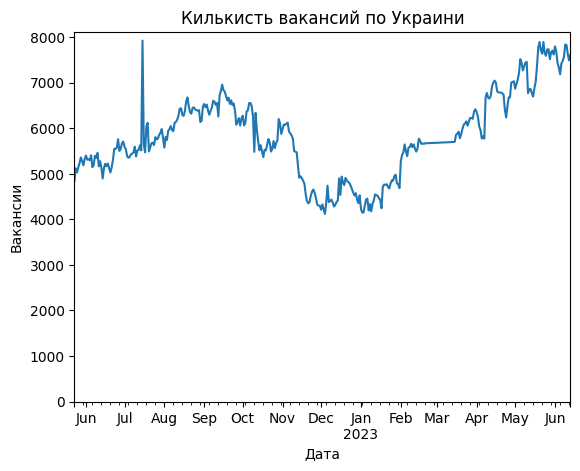

In [ ]:
df["Вакансии"].plot()
plt.title("Килькисть вакансий по Украини")
plt.xlabel('Дата')
plt.ylabel('Вакансии')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df["rolling_mean"]=df['Вакансии'].rolling(window=7).mean()
df

,Вакансии,rolling_mean
Дата,,
2022-05-23,4831.0,NaN
2022-05-24,5118.0,NaN
2022-05-25,5025.0,NaN
2022-05-26,5134.0,NaN
2022-05-27,5233.0,NaN
...,...,...
2023-06-09,7833.0,7462.285714
2023-06-10,7818.0,7517.857143
2023-06-11,7618.0,7558.571429


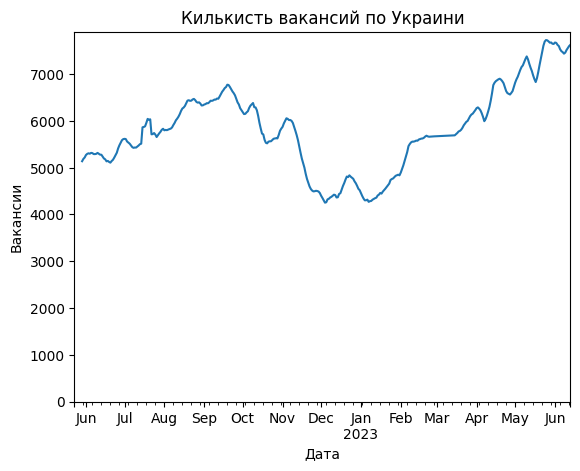

In [ ]:
df["rolling_mean"].plot()
plt.title("Килькисть вакансий по Украини")
plt.xlabel('Дата')
plt.ylabel('Вакансии')
plt.ylim(bottom=0)
plt.show()

In [ ]:
df.describe()

,Вакансии,rolling_mean
count,387.000000,381.000000
mean,5816.724806,5808.536745
std,912.306537,880.827433
min,4116.000000,4253.428571
25%,5227.500000,5270.714286
50%,5693.681818,5729.714286
75%,6420.000000,6391.857143
max,7920.000000,7730.714286
